Jupyter notebook file to test model, without having to rerun everything

Import libraries

In [113]:
from skimage.viewer import ImageViewer
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import feature
from skimage.filters import gaussian

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import random

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, RandomContrast, RandomBrightness
from keras.utils import to_categorical

Preprocessing filters

In [114]:
#load test image
image = imread("C:/Users/emmar/Documents/GitHub/VISN/Opdracht_1/flower.jpg")

#grayscale
image_gray = rgb2gray(image)

#edge detection
canny_filter = feature.canny(image_gray, sigma=2) 

#gaussian filter                    #for rgb image
gaussian_filter = gaussian(image, multichannel=True, sigma=2) 

# viewer = ImageViewer(image)
# viewer.show()

# viewer = ImageViewer(image_gray)
# viewer.show()

# viewer = ImageViewer(canny_filter)
# viewer.show()

# viewer = ImageViewer(gaussian_filter)
# viewer.show()

C:\Users\emmar\AppData\Local\Temp\ipykernel_18960\2925268095.py:10: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_filter = gaussian(image, multichannel=True, sigma=2)


Loading in the dataset
Dataset used for this project from: https://www.kaggle.com/datasets/grassknoted/asl-alphabet?resource=download
Tutorial: https://www.youtube.com/watch?v=j-3vuBynnOE

In [115]:
dataset_dir = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_train/asl_alphabet_train"
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

training_data = []

for letter in letters:
    #get directory of a certain letter
    path = os.path.join(dataset_dir, letter)

    #create number for each letter
    letter_num = letters.index(letter)
    print(letter)
    
    for image in os.listdir(path):
        #get one image
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

        #compress the image to a smaller resolution
        image_size = 50
        compressed_image_array = cv2.resize(image_array, (image_size, image_size))

        #add canny filter
        # canny_filter_image = feature.canny(compressed_image_array, sigma=3)

        #add gaussian filter
        # gaussian_filter_image = gaussian(compressed_image_array, sigma=2)

        #add new image to the training set
        training_data.append([compressed_image_array, letter_num])

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
nothing
space


Formating the train and test data

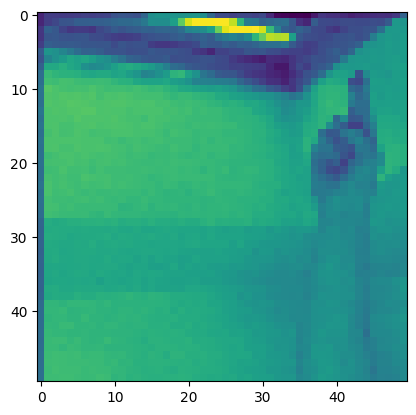

In [116]:
#randomize the images
random.shuffle(training_data)

plt.imshow(training_data[0][0])

train_images = []
train_labels = []

test_data_size = 10000

test_images = []
test_labels = []

#separate images and labels into the testing dataset
#(the first 10.000) and the training dataset (the rest)

#TODO can this be done easier? split?
for i in range(len(training_data)):
    if i < test_data_size:
        test_images.append(training_data[i][0])
        test_labels.append(training_data[i][1])
    else:
        train_images.append(training_data[i][0])
        train_labels.append(training_data[i][1])

#reshape train and test images
train_images = np.array(train_images).reshape(-1, image_size, image_size, 1)
test_images = np.array(test_images).reshape(-1, image_size, image_size, 1)

#normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

#normalize the images canny
# train_images = train_images - 0.5
# test_images = test_images - 0.5

Training and testing the CNN

In [118]:
#setting the model variables
num_filters = 30
filter_size = 3
pool_size = 2
num_epochs = 20

#creating the model and adding the layers
model = Sequential([

    RandomContrast(0.2),
    RandomBrightness(0.2, value_range=(-0.5, 0.5)),

    Conv2D(num_filters, filter_size, input_shape=train_images[0].shape),
    MaxPooling2D(pool_size=pool_size),

    Conv2D(num_filters, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),

    Flatten(),
    Dense(29, activation="sigmoid", name="dense")
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training the model
model.fit(train_images, to_categorical(train_labels), epochs=num_epochs, validation_split=0.15)

#testing the model
test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

Epoch 1/20


2046/2046 [==============================] - 110s 52ms/step - loss: 1.4121 - accuracy: 0.5914 - val_loss: 7.3418 - val_accuracy: 0.3454
Epoch 2/20
2046/2046 [==============================] - 111s 54ms/step - loss: 0.5041 - accuracy: 0.8467 - val_loss: 9.2069 - val_accuracy: 0.3860
Epoch 3/20
2046/2046 [==============================] - 108s 53ms/step - loss: 0.3297 - accuracy: 0.8987 - val_loss: 10.4730 - val_accuracy: 0.3906
Epoch 4/20
2046/2046 [==============================] - 103s 50ms/step - loss: 0.2521 - accuracy: 0.9214 - val_loss: 10.6197 - val_accuracy: 0.4281
Epoch 5/20
2046/2046 [==============================] - 106s 52ms/step - loss: 0.2011 - accuracy: 0.9387 - val_loss: 12.7482 - val_accuracy: 0.4051
Epoch 6/20
2046/2046 [==============================] - 104s 51ms/step - loss: 0.1720 - accuracy: 0.9472 - val_loss: 12.8432 - val_accuracy: 0.4227
Epoch 7/20
2046/2046 [==============================] - 103s 50ms/step - loss: 0.1471 - accuracy: 0.9549 - val_loss: 13.4327 

Testing the model

In [120]:
#for each letter
for i in range(len(letters) - 3):
    #open the test image version of the letter
    path = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_test/asl_alphabet_test/"+letters[i]+"_test.jpg"
    image_to_predict = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    #preprocess the image the same as images used for training
    compressed_image_to_predict = cv2.resize(image_to_predict, (image_size, image_size))
    reshaped_image_to_predict = compressed_image_to_predict.reshape(-1, image_size, image_size, 1)
    normalized_image_to_predict = (reshaped_image_to_predict / 255) - 0.5

    #predict the letter
    prediction = model.predict(normalized_image_to_predict)

    #print the actual letter instead of percentages
    predicted_letter = list(prediction[0]).index(max(prediction[0]))
    # print(prediction)
    print(letters[predicted_letter])

1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 29ms/step
B
1/1 [==============================] - 0s 24ms/step
C
1/1 [==============================] - 0s 28ms/step
D
1/1 [==============================] - 0s 30ms/step
E
1/1 [==============================] - 0s 24ms/step
F
1/1 [==============================] - 0s 27ms/step
P
1/1 [==============================] - 0s 28ms/step
H
1/1 [==============================] - 0s 23ms/step
D
1/1 [==============================] - 0s 23ms/step
P
1/1 [==============================] - 0s 30ms/step
K
1/1 [==============================] - 0s 29ms/step
L
1/1 [==============================] - 0s 25ms/step
M
1/1 [==============================] - 0s 24ms/step
N
1/1 [==============================] - 0s 24ms/step
O
1/1 [==============================] - 0s 30ms/step
P
1/1 [==============================] - 0s 22ms/step
Q
1/1 [==============================] - 0s 24ms/step
L
1/1 [=======================

Testing the model with the captured dataset

In [122]:
#for each letter
for i in range(len(letters) - 3):
    #open the test capture image version of the letter
    path = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_test/als_alphabet_test_captures/"+letters[i]+"_test.jpg"
    image_to_predict = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    #preprocess the image the same as images used for training
    compressed_image_to_predict = cv2.resize(image_to_predict, (image_size, image_size))
    reshaped_image_to_predict = compressed_image_to_predict.reshape(-1, image_size, image_size, 1)
    normalized_image_to_predict = (reshaped_image_to_predict / 255) - 0.5

    #predict the letter
    prediction = model.predict(normalized_image_to_predict)

    #print the actual letter instead of percentages
    predicted_letter = list(prediction[0]).index(max(prediction[0]))
    # print(prediction)
    print(letters[predicted_letter])

1/1 [==============================] - 0s 36ms/step
A
1/1 [==============================] - 0s 25ms/step
W
1/1 [==============================] - 0s 23ms/step
D
1/1 [==============================] - 0s 30ms/step
F
1/1 [==============================] - 0s 26ms/step
D
1/1 [==============================] - 0s 23ms/step
F
1/1 [==============================] - 0s 25ms/step
G
1/1 [==============================] - 0s 25ms/step
Y
1/1 [==============================] - 0s 28ms/step
W
1/1 [==============================] - 0s 34ms/step
G
1/1 [==============================] - 0s 49ms/step
W
1/1 [==============================] - 0s 24ms/step
D
1/1 [==============================] - 0s 22ms/step
W
1/1 [==============================] - 0s 31ms/step
W
1/1 [==============================] - 0s 27ms/step
D
1/1 [==============================] - 0s 25ms/step
D
1/1 [==============================] - 0s 21ms/step
G
1/1 [==============================] - 0s 20ms/step
W
1/1 [=======================

Save the model

In [108]:
model.save("ASL_model.keras")